<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

# TLDR Summary:
- RNG is actually pseudo RNG as we know it
- but due to Mersenne twister we don't have to worry too much :)

### 1.2 NumPy’s PRNG

In [7]:
import numpy as np

np.random.rand()                # Give one number

0.06268549751149577

In [2]:
np.random.rand(10)              # Give ten numbers`

array([0.37402391, 0.17065637, 0.31709639, 0.90342896, 0.89167414,
       0.630435  , 0.96936897, 0.28303497, 0.41829708, 0.20077473])

In [3]:
#give randomised array of 5 rows 2 columns

np.random.rand(5,2)             # Give five sets of 2


array([[0.42470504, 0.78775582],
       [0.68563097, 0.41639863],
       [0.67786602, 0.66868493],
       [0.45959539, 0.24521845],
       [0.0989501 , 0.56120892]])

In [21]:
#testing to show that the distribution is actually relatively normal 
n = 10000
random_numbers = np.random.rand(n)
# The numbers less than .5 must be about 50%
np.sum(random_numbers < .5) / n * 100

50.17

In [5]:
# The numbers less than .25 must be about 25%
np.sum(random_numbers < .25) / n * 100

24.63

In [6]:
# The numbers more than .75 must be about 25%
np.sum(random_numbers > .75) / n * 100

25.16

### 1.3 A simple graphical test

Text(0, 0.5, 'Value of random number')

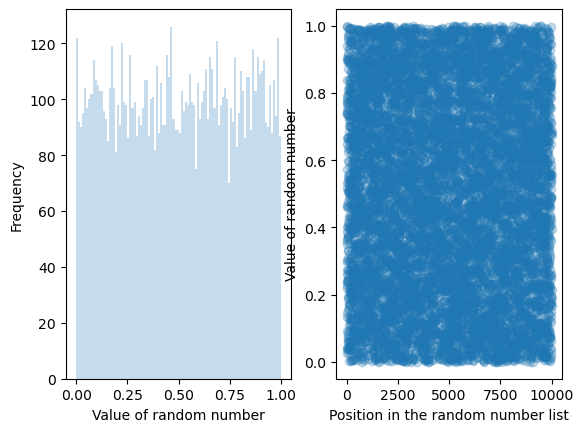

In [25]:
n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

#reminder to self that positional argument cannot follow keyword argument 
#AKA '=' sign argument cannot come before 'variable name' argument

### 1.4 Uniformly beyond \([0,1)\)

Text(0, 0.5, 'Value of random number')

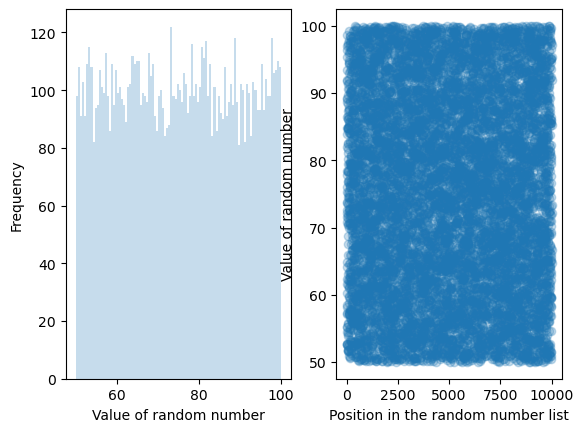

In [24]:
import numpy as np
from matplotlib import pyplot as plt

n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

#range is now shifted up to between 50 and 100 but distribution is constant

### 1.5 ‘seeding’ a PRNG

In [26]:
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([73, 69,  4, 31,  0, 48, 61, 52, 76,  0])

In [8]:
np.random.seed(1234)              # Specifying a seed
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

#wait how does seeding work
#how does 1234 kick off the algorithm if 1234 is not even within the range of 1 to 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

## 2 Simulating a Magic-8 Ball

## 3 Flipping Coins

### 3.1 A fair coin

In [9]:
#magic ball 8 part 

def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)

questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')
    

#why does it stop at 3 answers
#what is the code logic / how does the argument insertion work 

Q: Will I be pretty?
A: Ask again later.

Q: Will I be rich?
A: Better not tell you now.

Q: Will I be in trouble?
A: My reply is no.



In [10]:
np.random.choice(['Head', 'Tails'])

no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Tails', 'Head', 'Tails', 'Tails', 'Head', 'Head', 'Tails', 'Head',
       'Head', 'Tails'], dtype='<U5')

In [11]:
#numerical equivalent 

def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

#wait whaaaaat

Number of heads: 51.60%


### 3.2 A biased coin

In [12]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 66.70%


### 3.3 A flipping experiment

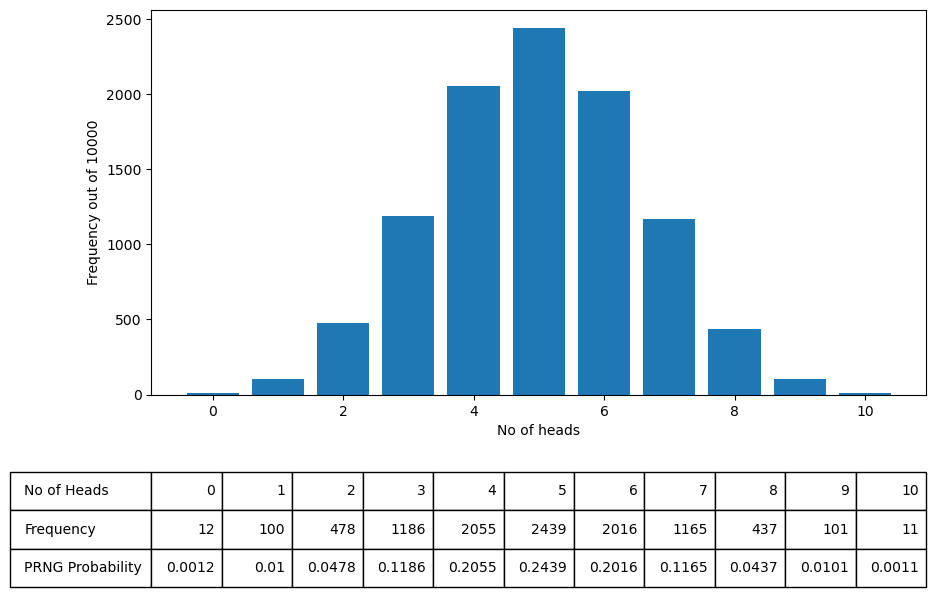

In [31]:
import numpy as np
from scipy.stats import binom
from matplotlib import pyplot as plt

no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)

heads_probability = heads_counts/no_of_repeats

#plotting this datam
plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability,],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])


In [22]:
#binomial method 

from scipy.stats import binom

binom.pmf(k=7, n=10, p=.5)

binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)

print(binomial_probabilities)

[0.00097656 0.00976563 0.04394531 0.1171875  0.20507812 0.24609375
 0.20507812 0.1171875  0.04394531 0.00976563 0.00097656]


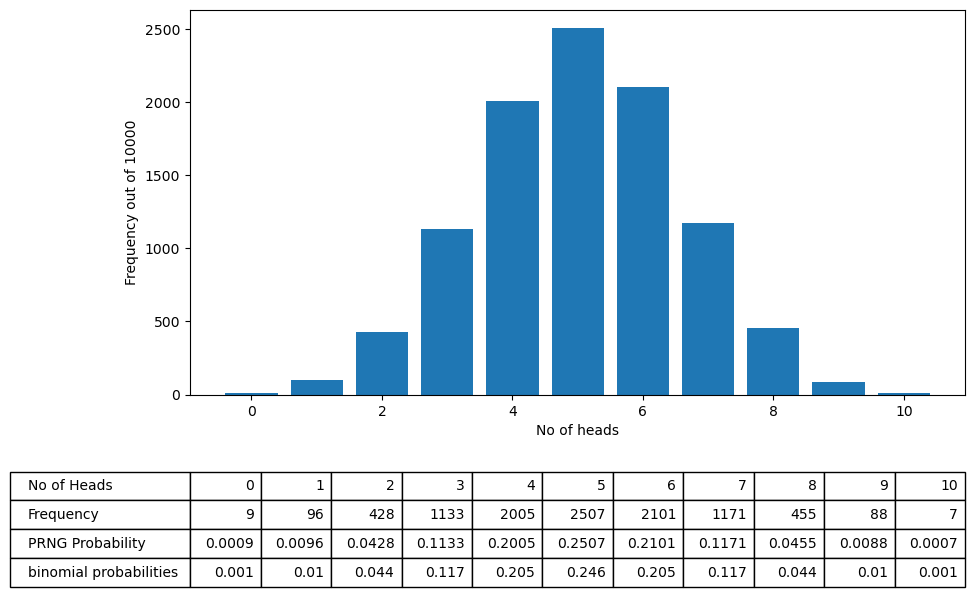

In [32]:
import numpy as np
from scipy.stats import binom
from matplotlib import pyplot as plt

no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)

heads_probability = heads_counts/no_of_repeats

# binom.pmf(k=7, n=10, p=.5)

binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)
binomial_probabilities = binomial_probabilities.round(3)

#plotting this datam
plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability, binomial_probabilities],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability','binomial probabilities'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

## Exercise 1 :  12C, 13C

In [66]:
#testing box
#numerically solving this qn using code from above

def findcarbon(no_of_c=1, probability=0.0111):
    
    results = np.random.rand(no_of_c)
    no_of_13c = np.sum(results > probability)
    return no_of_13c

import math
no_of_c=1000000
no_of_13c = findcarbon(no_of_c)
print(f'Number of 13C: {no_of_13c/no_of_c*27:.2f}')

Number of 13C: 26.69
